In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #OneHotEncoder are for preparing the data for the model.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor #RandomForestRegressor is the regression algorithm.
from sklearn.linear_model import LogisticRegression #LogisticRegression is the classification algorithm.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, confusion_matrix #evaluation metrics

In [ ]:
#Load the data 
df = pd.read_csv("final_dataset.csv")
df.head()

,Trip_ID,Date,City,Vehicle_Type,Fuel_Type,Route,Distance_km,Load_Weight_kg,Total_Fuel_Cost,Petrol_Price,Diesel_Price,Temp_Mean_C,Precipitation_mm
0,925eb005-b309-4038-b367-4e169e96aba4,2025-10-22,Chennai,Van,Diesel,Route_C,2114.72,563.96,17298.10,100.8,92.39,26.8,35.2
1,6671f6c0-6dbc-4d65-a271-53197f308a35,2025-10-22,Chennai,Motorcycle,Petrol,Route_B,2333.02,0.00,5501.02,100.8,92.39,26.8,35.2
2,b0bf48c7-ed4b-4089-ae15-54f36b2bc09d,2025-10-22,Chennai,Van,Diesel,Route_C,964.37,57.65,7823.13,100.8,92.39,26.8,35.2
3,4f35166e-a6cc-45a2-8262-8eeb51e617f3,2025-10-22,Chennai,Motorcycle,Petrol,Route_C,1351.28,0.00,3186.18,100.8,92.39,26.8,35.2
4,8437191a-9a9c-4a3f-a4e1-472d12e9b7ed,2025-10-22,Chennai,Van,Diesel,Route_A,2473.00,454.14,20192.71,100.8,92.39,26.8,35.2


In [ ]:
#Data Inspection
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96544 entries, 0 to 96543
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Trip_ID           96544 non-null  object 
 1   Date              96544 non-null  object 
 2   City              96544 non-null  object 
 3   Vehicle_Type      96544 non-null  object 
 4   Fuel_Type         96544 non-null  object 
 5   Route             96544 non-null  object 
 6   Distance_km       96544 non-null  float64
 7   Load_Weight_kg    96544 non-null  float64
 8   Total_Fuel_Cost   96544 non-null  float64
 9   Petrol_Price      96544 non-null  float64
 10  Diesel_Price      96544 non-null  float64
 11  Temp_Mean_C       96544 non-null  float64
 12  Precipitation_mm  96544 non-null  float64
dtypes: float64(7), object(6)
memory usage: 9.6+ MB
None
(96544, 13)
        Distance_km  Load_Weight_kg  Total_Fuel_Cost  Petrol_Price  \
count  96544.000000    96544.000000     96544.0

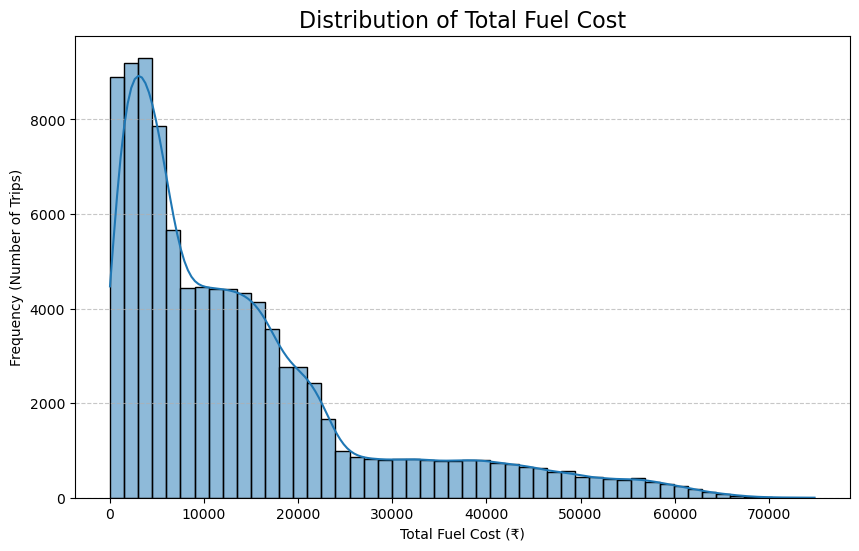

EDA Plot 1: Distribution of Total Fuel Cost (Histogram)


In [ ]:
#EDA Plot 1: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Fuel_Cost'], kde=True, bins=50)
plt.title('Distribution of Total Fuel Cost', fontsize=16)
plt.xlabel('Total Fuel Cost (₹)')
plt.ylabel('Frequency (Number of Trips)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("EDA Plot 1: Distribution of Total Fuel Cost (Histogram)")

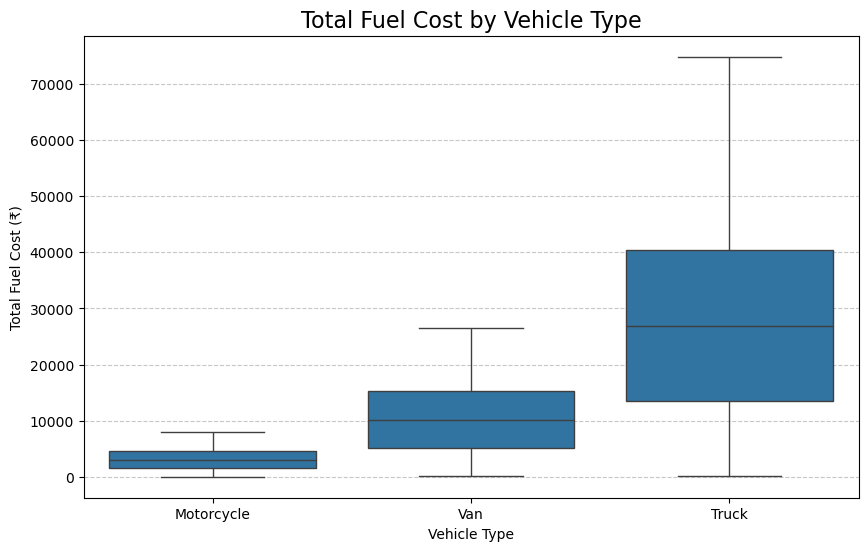

EDA Plot 2: Cost by Vehicle Type (Boxplot)


In [ ]:
#EDA Plot 2: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Vehicle_Type', y='Total_Fuel_Cost', 
            order=['Motorcycle', 'Van', 'Truck']) # Order them logically
plt.title('Total Fuel Cost by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Fuel Cost (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("EDA Plot 2: Cost by Vehicle Type (Boxplot)")

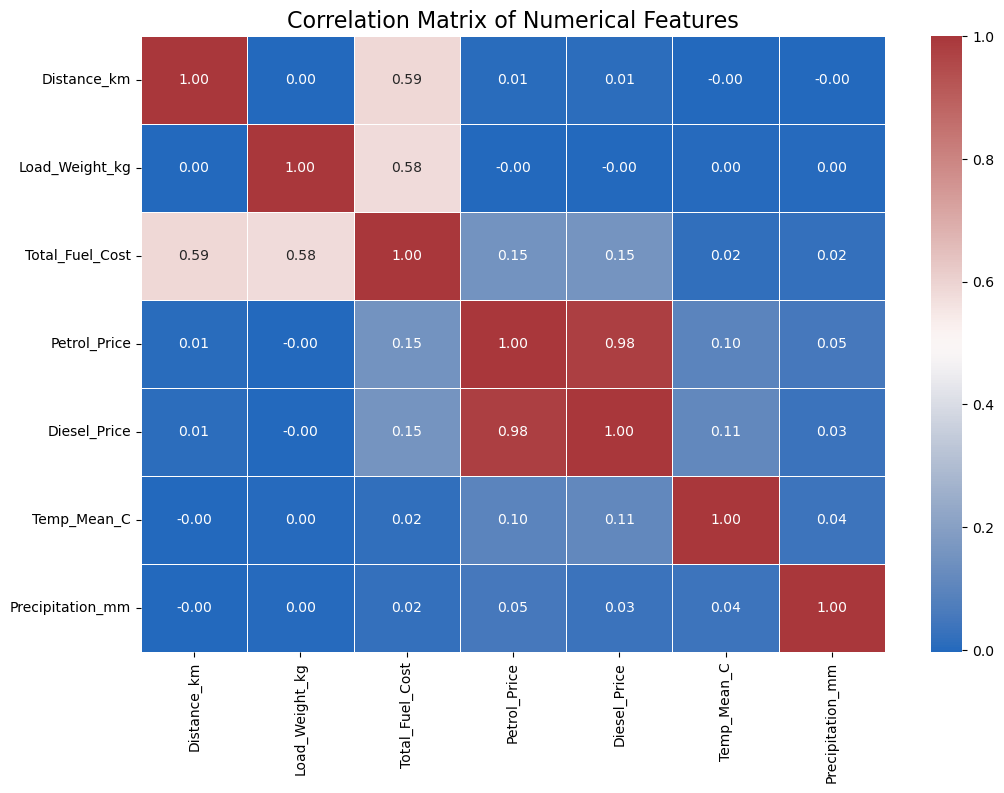

EDA Plot 4: Correlation Heatmap


In [ ]:
#EDA Plot 3: Correlation Heatmap
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()
print("EDA Plot 3: Correlation Heatmap")

In [ ]:
#Define Features (X) and Target (y)
y = df['Total_Fuel_Cost']
X = df.drop(['Total_Fuel_Cost', 'Trip_ID','Date'], axis=1)
categorical_features = ['City', 'Vehicle_Type', 'Fuel_Type', 'Route']
numerical_features = X.drop(columns=categorical_features).columns

In [ ]:
#Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

In [ ]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor), #preprocessor automatically runs the OneHotEncoding.
    ('regressor', RandomForestRegressor(n_estimators=120, random_state=42, n_jobs=-1)) #regressor Feeds the preprocessed data into the RandomForestRegressor to make the cost prediction.
])

In [ ]:
#Model Training
model.fit(X_train, y_train)
#Model Prediction
y_pred = model.predict(X_test)

In [ ]:
#Model Evaluation
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")

R-squared (R²): 0.9996
Mean Absolute Error (MAE): ₹120.62


In [15]:
print("\n--- Example Prediction ---")
X_sample = X_test.iloc[9] 
y_actual = y_test.iloc[9]
y_sample_pred = model.predict(X_sample.to_frame().T)[0]

print(f"Trip Details: \n{X_sample}\n")
print(f"Actual Cost:    ₹{y_actual:.2f}")
print(f"Predicted Cost: ₹{y_sample_pred:.2f}")


--- Example Prediction ---
Trip Details: 
City                  Mumbai
Vehicle_Type           Truck
Fuel_Type             Diesel
Route                Route_A
Distance_km           545.47
Load_Weight_kg      12703.49
Petrol_Price            76.9
Diesel_Price           60.89
Temp_Mean_C             26.7
Precipitation_mm         0.0
Name: 91995, dtype: object

Actual Cost:    ₹7803.42
Predicted Cost: ₹7834.03


In [16]:
import joblib
joblib.dump(model, 'Regression_model.pkl')

['Regression_model.pkl']